# Example 
of building a notebook-friendly object into the output of the data API

Author: Dan Gunter

## Initialization

### Imports
Set up matplotlib, the qgrid (nice table), and import biokbase

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import qgrid
qgrid.nbinstall()

In [3]:
from biokbase import data_api
from biokbase.data_api import display
display.nbviewer_mode(True)

True

### Authorization
In the vanilla notebook, you need to manually set an auth. token. You'll need your own value for this, of course.
Get this from the running narrative, e.g. write a narrative code cell that has:
`import os; print(os.environ('KB_AUTH_TOKEN'))`

In [4]:
import os
os.environ['KB_AUTH_TOKEN'] = open('/tmp/kb_auth_token.txt').read().strip()

## Find and load an object
Open the workspace (1019) and get a Rhodobacter assembly from it

In [5]:
b = data_api.browse(1019)

In [6]:
x = b[0].object # Assembly object

## Get the contigs for the assembly
This takes a while because the current implementation loads the whole assembly, not just the 300 or so strings with the contig values.

In [7]:
cid_strings = x.get_contig_ids() # 1 min

In [8]:
cids = display.Contigs(cid_strings)

## View the contigs
The `Contigs` object wraps the list of contigs as a Pandas DataFrame (with the qgrid output enabled), so as you can see the plot() function is immediately available. The list of strings in the raw contig IDs is parsed to a set of columns and values for the DataFrame.

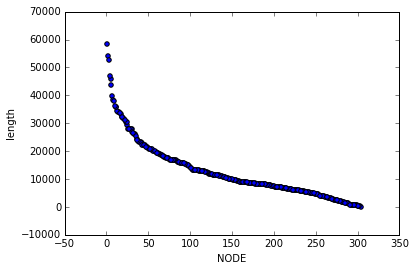

In [9]:
cids.plot(x='NODE', y='length', kind='scatter')

The default display is the nice sortable, scrollable, etc. table from the `qgrid` package.

In [10]:
cids